In [1]:
# 引入数据
import pandas as pd
data = pd.read_csv('~/data/cbcpv/marathon/marathon.csv')
data.sample(5)

,age,gender,split,final
19841,34,M,01:55:25,04:50:03
11002,28,W,01:55:00,04:11:00
11619,26,M,01:40:28,04:13:52
4068,34,M,01:38:30,03:30:21
6922,35,M,01:37:44,03:48:37


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     37250 non-null  int64 
 1   gender  37250 non-null  object
 2   split   37250 non-null  object
 3   final   37250 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [3]:
import datetime
def convert_time(s):
    h,m,s=map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [31]:
df=pd.read_csv(
    '~/data/cbcpv/marathon/marathon.csv',
    converters={
        'split': convert_time,
        'final': convert_time
    }
)
df.dtypes


age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [32]:
d = datetime.timedelta(hours=1, minutes=0, seconds=0)
df2 = pd.DataFrame({'time':[d]})
df2.astype(int)

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_39195/3603249330.py:3: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df2.astype(int)


,time
0,3600000000000


In [33]:
d=datetime.timedelta(hours=1, minutes=0, seconds=0)
df2=pd.DataFrame({'time':[d]})
df2.astype(int) * 1e-9

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_39195/2466902886.py:3: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df2.astype(int) * 1e-9


,time
0,3600.0


In [34]:
df['split_sec']=df['split'].astype(int) * 1e-9
df['final_sec']=df['final'].astype(int) * 1e-9
df.sample(5)

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_39195/1549459796.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['split_sec']=df['split'].astype(int) * 1e-9
/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_39195/1549459796.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['final_sec']=df['final'].astype(int) * 1e-9


,age,gender,split,final,split_sec,final_sec
11725,35,M,0 days 01:53:53,0 days 04:14:19,6833.0,15259.0
19815,24,M,0 days 01:58:45,0 days 04:49:57,7125.0,17397.0
5754,49,M,0 days 01:42:39,0 days 03:41:05,6159.0,13265.0
33166,46,M,0 days 02:31:37,0 days 06:06:17,9097.0,21977.0
9226,36,W,0 days 01:49:06,0 days 04:01:55,6546.0,14515.0


In [35]:
df.describe()

,age,split,final,split_sec,final_sec
count,37250.000000,37250,37250,37250.000000,37250.000000
mean,40.697369,0 days 02:03:54.425664429,0 days 04:48:09.303597315,7434.425664,17289.303597
std,10.220043,0 days 00:22:55.093889674,0 days 01:03:32.145345151,1375.093890,3812.145345
min,17.000000,0 days 01:05:21,0 days 02:08:51,3921.000000,7731.000000
25%,33.000000,0 days 01:48:25,0 days 04:02:24,6505.000000,14544.000000
50%,40.000000,0 days 02:01:13,0 days 04:44:25,7273.000000,17065.000000
75%,48.000000,0 days 02:16:11,0 days 05:27:36,8171.000000,19656.000000
max,86.000000,0 days 04:59:49,0 days 10:01:08,17989.000000,36068.000000


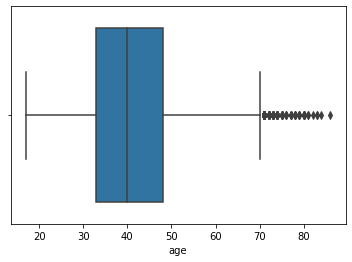

In [36]:
%matplotlib inline
import seaborn as sns
ax=sns.boxplot(x=df['age'])

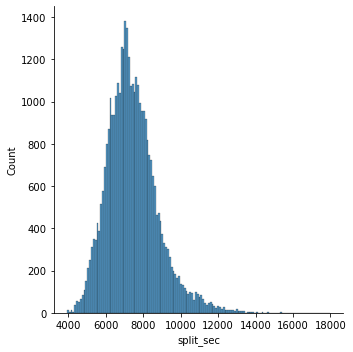

In [37]:
sns.displot(df['split_sec'])

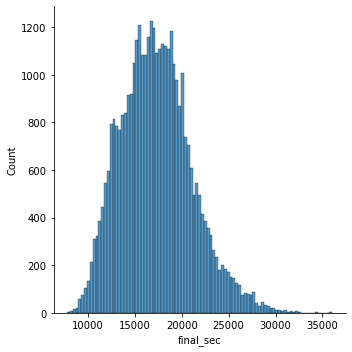

In [38]:
sns.displot(df['final_sec'])

<AxesSubplot:xlabel='gender', ylabel='final_sec'>

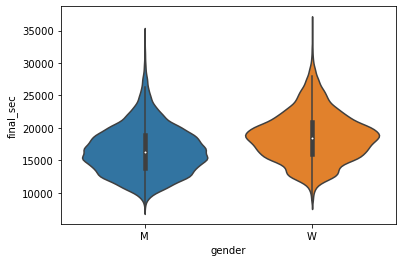

In [39]:
sns.violinplot(x='gender', y='final_sec', data=df)

/Users/du/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


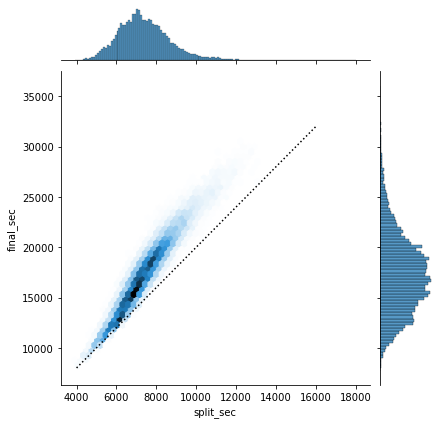

In [40]:
g=sns.jointplot('split_sec', 'final_sec', data=df, kind='hex')

import numpy as np
g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [41]:
df['split_frac']=1-2*df['split_sec']/df['final_sec']
df.sample(5)

,age,gender,split,final,split_sec,final_sec,split_frac
2065,35,W,0 days 01:31:41,0 days 03:14:40,5501.0,11680.0,0.058048
9001,43,W,0 days 01:58:19,0 days 04:00:44,7099.0,14444.0,0.017031
30039,34,M,0 days 02:25:17,0 days 05:39:21,8717.0,20361.0,0.143755
27456,62,W,0 days 02:13:28,0 days 05:25:01,8008.0,19501.0,0.178709
13335,41,M,0 days 01:45:36,0 days 04:21:00,6336.0,15660.0,0.190805


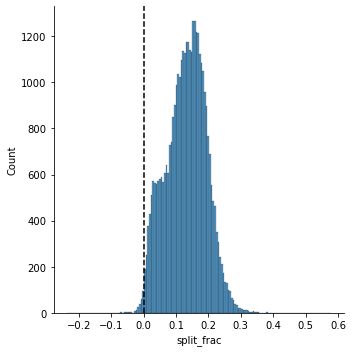

In [42]:
import matplotlib.pyplot as plt
sns.displot(df['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle='--')

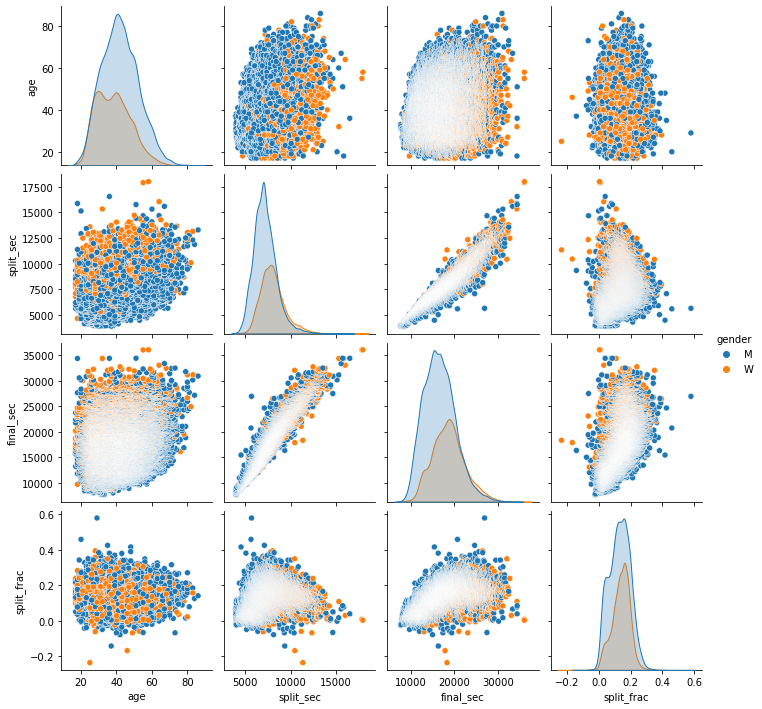

In [43]:
sns.pairplot(
    data=df,
    vars=['age','split_sec','final_sec','split_frac'],
    hue='gender'
)

In [44]:
(df.age>=80).sum()

15

<AxesSubplot:xlabel='age_dec', ylabel='split_frac'>

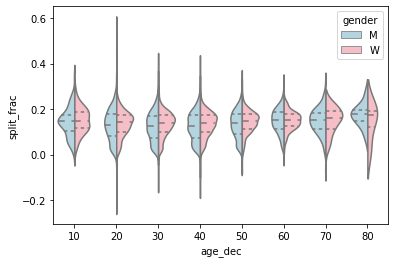

In [45]:
df['age_dec']=df['age'].map(lambda age: 10*(age//10))
sns.violinplot(
    x='age_dec', 
    y='split_frac', 
    hue='gender', 
    data=df, 
    split=True, 
    inner='quartile', 
    palette=['lightblue', 'lightpink']
)

<AxesSubplot:xlabel='age_dec', ylabel='final_sec'>

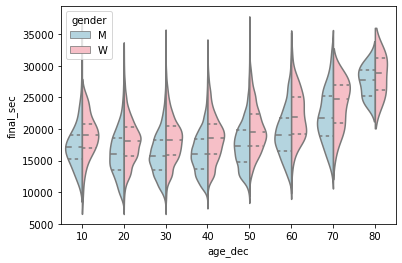

In [46]:
sns.violinplot(
    x='age_dec',
    y='final_sec',
    hue='gender',
    data=df,
    split=True,
    inner='quartile',
    palette=['lightblue', 'lightpink']
)